In [1]:
# Import necessary libraries
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
# Get and read the data

# Get data from ProPublica
url = 'https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv'
# Read and display summary
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

In [3]:
# Transform into a binary classification problem

# Create a feature to score recividism score
# Add new column that translates the risk score (decile_score) into a binary label
# Any score of 5 or higher (medium or high risk) means that a defendant is treated
# as a likely recividist, and a score of 4 or lower is considered as low risk. Low 
# risk means that a defendant is unlikely to re-offend.

# Create feature called 'is_med_or_high_risk'
df['is_med_or_high_risk'] = (df['decile_score'] >= 5).astype(int) #translate

In [4]:
# Preview new column
df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid,is_med_or_high_risk
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1,0
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1,0
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0,1
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,Low,2013-03-26,NaN,NaN,2,0,1102,0,0,0


In [5]:
# Evaluate model performance

'''
To evaluate the performance of the model, we need to understand the model's 
prediction to the 'truth':
- The risk score of the COMPAS system is 'decile_score'
- The classificiation of COMPAS as low, medium, or high risk is in the newly 
created column called 'is_med_or_high_risk' column
- The 'true' recividism value (the risk that a criminal defendant will re-offend)
is in the 'two_year_recid' column.
'''

# Compute the accuracy
np.mean(df['is_med_or_high_risk'] == df['two_year_recid'])
np.mean(df['two_year_recid'])

"\nTo evaluate the performance of the model, we need to understand the model's \nprediction to the 'truth':\n- The risk score of the COMPAS system is 'decile_score'\n- The classificiation of COMPAS as low, medium, or high risk is in the newly \ncreated column called 'is_med_or_high_risk' column\n- The 'true' recividism value (the risk that a criminal defendant will re-offend)\nis in the 'two_year_recid' column.\n"

0.6537288605489326

0.45065151095092876

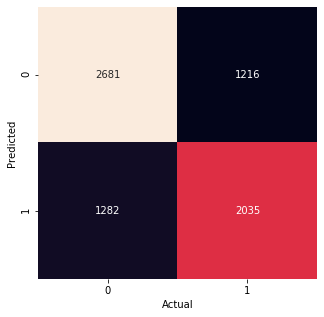

In [6]:
# Create a confusion matrix to derive a whole set of classifier metrics
# TPR, TNR, PPV, NPV, FPR, FDR, FNR, FOR
cm = pd.crosstab(df['is_med_or_high_risk'], df['two_year_recid'], 
                               rownames=['Predicted'], colnames=['Actual'])
p = plt.figure(figsize=(5,5));
p = sns.heatmap(cm, annot=True, fmt="d", cbar=False)

In [7]:
# Using sklearn's confusion matrix to pull out these values and compute any metrics
# of interest
[[tn , fp],[fn , tp]]  = confusion_matrix(df['two_year_recid'], df['is_med_or_high_risk'])
print("True negatives:  ", tn)
print("False positives: ", fp)
print("False negatives: ", fn)
print("True positives:  ", tp)

True negatives:   2681
False positives:  1282
False negatives:  1216
True positives:   2035


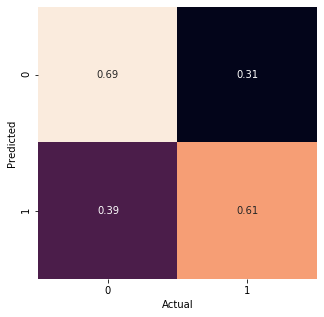

In [8]:
# Normalize by row - show the PPV, FDR, FOR, NPV
cm = pd.crosstab(df['is_med_or_high_risk'], df['two_year_recid'], 
                               rownames=['Predicted'], colnames=['Actual'], normalize='index')
p = plt.figure(figsize=(5,5));
p = sns.heatmap(cm, annot=True, fmt=".2f", cbar=False)

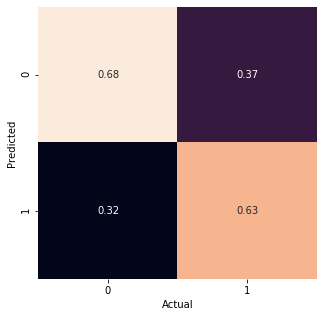

In [9]:
# Normalize by column, show the TPR, FPR, FNR, TNR
cm = pd.crosstab(df['is_med_or_high_risk'], df['two_year_recid'], 
                               rownames=['Predicted'], colnames=['Actual'], normalize='columns')
p = plt.figure(figsize=(5,5));
p = sns.heatmap(cm, annot=True, fmt=".2f", cbar=False)

In [10]:
fpr = fp/(fp+tn)
fnr  = fn/(fn+tp)

print("False positive rate (overall): ", fpr)
print("False negative rate (overall): ", fnr)

False positive rate (overall):  0.32349230381024474
False negative rate (overall):  0.3740387573054445


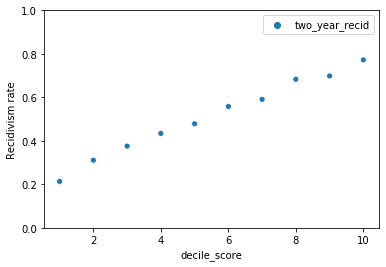

In [11]:
# Evaluate the risk score, instead of just labels
# The risk score is meant to indicate the probability that a defendant will re-offend
d = df.groupby('decile_score').agg({'two_year_recid': 'mean'})
# plot
sns.scatterplot(data=d);
plt.ylim(0,1);
plt.ylabel('Recidivism rate');

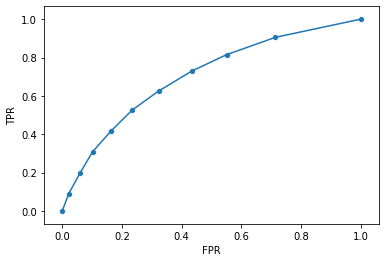

In [12]:
# By examining the graph above, we can see that defendants with a higher
# COMPAS score indeed had higher rates of recividism.
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(df['two_year_recid'], df['decile_score'])
sns.scatterplot(x=fpr, y=tpr, );
sns.lineplot(x=fpr, y=tpr);
plt.ylabel("TPR");
plt.xlabel("FPR");

In [13]:
auc = roc_auc_score(df['two_year_recid'], df['decile_score'])
auc

0.7021662544019724

In [15]:
# Accuracy show above: 0.7021662544019724

# Fairness
# Race is not an explicit input to COMPAS, but some of the questions are 
# directly correlated with race

# Race frequency in the data
df['race'].value_counts()

African-American    3696
Caucasian           2454
Hispanic             637
Other                377
Asian                 32
Native American       18
Name: race, dtype: int64

In [16]:
# The main focus here will be on African-Americans or Caucasian defendants,
# since they are the subject of the ProPublica claim
df = df[df.race.isin(["African-American", "Caucasian"])]
# Compare accuracy
(df['two_year_recid'] == df['is_med_or_high_risk']).astype(int).groupby(df['race']).mean()

race
African-American    0.638258
Caucasian           0.669927
dtype: float64

In [17]:
# It's not completely the same, but very similar
# Here, we are assessing the type of fairness known as 'overall accuracy equality'

# Now, let's see whether a defendant who is classified as medium or high risk has 
# the same probability of recividism for the two groups.
# In other words, we will compute the PPV for each group

# Compute PPV
df[df['is_med_or_high_risk'] == 1]['two_year_recid'].groupby(df['race']).mean()

race
African-American    0.629715
Caucasian           0.591335
Name: two_year_recid, dtype: float64

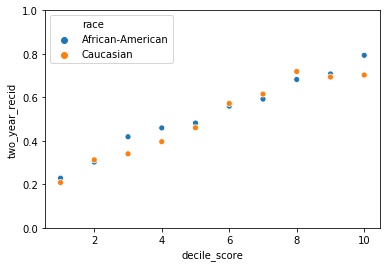

In [18]:
# Again, similar but not exact. This is the type of fairness known as 'predictive parity'
# Let's extend this idea and check whether a defendant with a given score has the same
# probability of recidivism for the two groups:
d = pd.DataFrame(df.groupby(['decile_score','race']).agg({'two_year_recid': 'mean'}))
d = d.reset_index()
im = sns.scatterplot(data=d, x='decile_score', y='two_year_recid', hue='race');
im.set(ylim=(0,1));

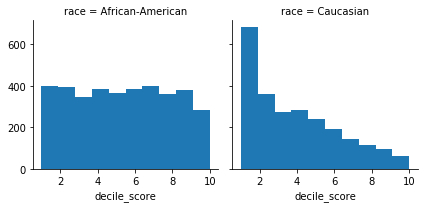

In [19]:
# As per the graph, we can see that both African-American and Caucasian
# defendants, for any given COMPAS score, recividism rates are similar.
# This type of fairness is known as 'calibration'

# Let's take a look ath the frequency in which defendants of each race
# are assigned each COMPAS score:

# Frequency plot
g = sns.FacetGrid(df, col="race", margin_titles=True);
g.map(plt.hist, "decile_score", bins=10);

In [20]:
# Now we can see some major differences. We can observe that Caucasian
# defendants in this sample are more likel to be assigned a low risk score.

# To assess 'unfairness', we need to know the true prevalence - whether the 
# rates of recividism are the same in both populations, according to the data

# Base rates
df.groupby('race').agg({'two_year_recid': 'mean',  
                        'is_med_or_high_risk': 'mean', 
                        'decile_score': 'mean'})

,two_year_recid,is_med_or_high_risk,decile_score
race,,,
African-American,0.514340,0.588203,5.368777
Caucasian,0.393643,0.348003,3.735126


In [21]:
# The predictions of the model are pretty close to the actual prevalence in the
# population.
'''
So far, the analyis suggests that COMPAS is fair with respect to race:
- The overall accuracy of the COMPAS label is the same, regardless of race (overall accuracy equality)
- The likelihood of recividism among defendants labeled as medium or high risk is similar,
 regardless of race (predictive parity)
 - For any given COMPAS socre, the risk of recividism is similar, regardless of race -
 the meaning of the score is consistent across race (calibration)
 - We do not have statistical parity (a type of fairness corresponding to equal probability
of positive classification), but we don't necessarily expect to when the prevalence of actual
positive is different between groups.
'''

# Let's take a look at that
black_threshold  = 6
df_black = df[df['race']=="African-American"].copy()
df_black['is_med_or_high_risk'] = (df_black['decile_score']>=black_threshold).astype(int)
[[tn , fp],[fn , tp]]  = confusion_matrix(df_black['two_year_recid'], df_black['is_med_or_high_risk'])
print("False positive rate (Black)      : ", fp/(fp+tn))
print("False negative rate (Black)      : ", fn/(fn+tp))
print("Positive predictive value (Black): ", tp/(tp+fp))
print("Negative predictive value (Black): ", tn/(tn+fn))

"\nSo far, the analyis suggests that COMPAS is fair with respect to race:\n- The overall accuracy of the COMPAS label is the same, regardless of race (overall accuracy equality)\n- The likelihood of recividism among defendants labeled as medium or high risk is similar,\n regardless of race (predictive parity)\n - For any given COMPAS socre, the risk of recividism is similar, regardless of race -\n the meaning of the score is consistent across race (calibration)\n - We do not have statistical parity (a type of fairness corresponding to equal probability\nof positive classification), but we don't necessarily expect to when the prevalence of actual\npositive is different between groups.\n"

False positive rate (Black)      :  0.34317548746518106
False negative rate (Black)      :  0.37243556023145713
Positive predictive value (Black):  0.6594803758982863
Negative predictive value (Black):  0.6248012718600954


In [22]:
# Adjust for white defendants
white_threshold  = 4
df_white = df[df['race']=="Caucasian"].copy()
df_white['is_med_or_high_risk'] = (df_white['decile_score']>=white_threshold).astype(int)
[[tn , fp],[fn , tp]]  = confusion_matrix(df_white['two_year_recid'], df_white['is_med_or_high_risk'])
print("False positive rate (white)      : ", fp/(fp+tn))
print("False negative rate (white)      : ", fn/(fn+tp))
print("Positive predictive value (white): ", tp/(tp+fp))
print("Negative predictive value (white): ", tn/(tn+fn))

False positive rate (white)      :  0.35013440860215056
False negative rate (white)      :  0.36024844720496896
Positive predictive value (white):  0.5425812115891132
Negative predictive value (white):  0.7353612167300381


In [23]:
'''
Why is it so tricky to satisfy multiple types of fairness at once? 
This is due to a proven impossibility result.

Any time the base rate (prevalence of the positive condition) is different
in the two groups, and we do not have a perfect classifier

Then we can't simultanesouly satisfy:
- Equal PPV and NPV for both groups (known as conditional use accuracy equality)
- Equal FPR and FNR for both groups (known as equalized odds or conditional procedure
accuracy equality)

So what does all of this mean?
- A model can be biased with respect to age, race, gender, if those features are
not used as input to the model
- There are many measures of fairness, it may be impossible to satisfy some combination
of these simultaneously 
- Human biases and unfairness in society leak into the data used to train machine learning
models.

All of this was from an article by Farham Rahman.
Link: https://towardsdatascience.com/compas-case-study-fairness-of-a-machine-learning-model-f0f804108751
'''

"\nWhy is it so tricky to satisfy multiple types of fairness at once? \nThis is due to a proven impossibility result.\n\nAny time the base rate (prevalence of the positive condition) is different\nin the two groups, and we do not have a perfect classifier\n\nThen we can't simultanesouly satisfy:\n- Equal PPV and NPV for both groups (known as conditional use accuracy equality)\n- Equal FPR and FNR for both groups (known as equalized odds or conditional procedure\naccuracy equality)\n\nSo what does all of this mean?\n- A model can be biased with respect to age, race, gender, if those features are\nnot used as input to the model\n- There are many measures of fairness, it may be impossible to satisfy some combination\nof these simultaneously \n- Human biases and unfairness in society leak into the data used to train machine learning\nmodels.\n\nAll of this was from an article by Farham Rahman.\nLink: https://towardsdatascience.com/compas-case-study-fairness-of-a-machine-learning-model-f0f8